<a href="https://colab.research.google.com/github/sandhrabijoy/practice/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/BreastCancerWisconsin.csv")
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop(["id","Unnamed: 32"], inplace = True, axis = 1)

data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data = data.rename(columns = {"diagnosis":"target"})

In [ ]:
data.target = [1 if each.strip() == "M" else 0 for each in data.target]

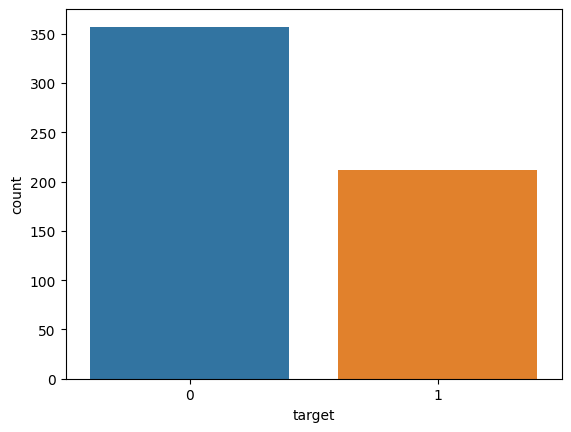

In [ ]:
sns.countplot(x = data.target)
plt.show()

In [ ]:
y = data.target
x = data.drop(["target"], axis = 1)
columns = x.columns.tolist()

print(columns)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)

In [ ]:
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,-0.948166,...,-0.197620,-0.506748,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748
1,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,-0.612491,...,-0.422917,-0.458495,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807
2,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,1.574228,...,0.036022,-1.192272,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264
3,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,-0.827986,...,-0.502189,-0.583287,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899
4,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,-0.642882,...,-0.195534,0.596414,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613


In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Text(0.5, 1.0, 'PCA: p1 vs p2')

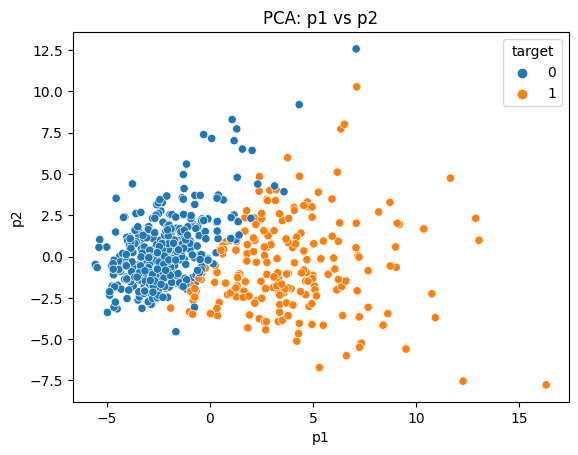

In [ ]:
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y

sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")

In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

In [ ]:
def KNN_Best_Params(x_train,x_test,y_train,y_test):

    k_range = list(range(1,10))
    weight_options = ["uniform","distance"]

    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train,y_train)

    print("Best training score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)

    return grid

In [ ]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)


Best training score: 0.9245512820512822 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9415204678362573, Train Score: 0.9396984924623115

CM Test:  [[104   4]
 [  6  57]]
CM Train:  [[240   9]
 [ 15 134]]


Text(0.5, 1.0, "2-Class classification (K=9, weighs= 'uniform')")

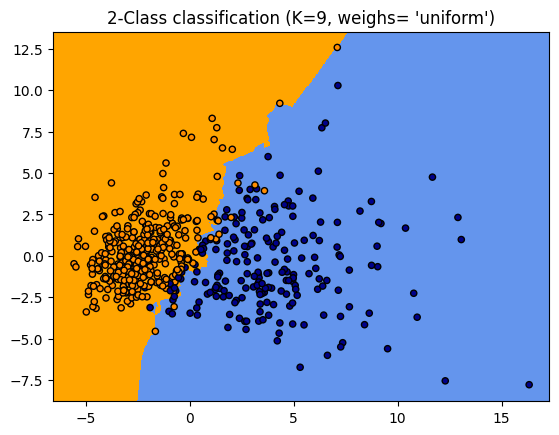

In [ ]:
cmap_light = ListedColormap(["orange","cornflowerblue"])
cmap_bold = ListedColormap(["darkorange","darkblue"])

h = .05 # step size in the mesh

X = X_reduced_pca
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# plot also the training points

plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, edgecolor = "k", s = 20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("%i-Class classification (K=%i, weighs= '%s')"
         % (len(np.unique(y)), grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))